# Introduction to Artificial Neural Networks
## Assignment #2
### Rhichard Koh

In [31]:
# importing the libraries
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
from keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import cv2

# 1. Perform an extensive exploratory data analysis (EDA) and provide a preliminary investigation of the dataset.

Text(0, 0.5, '# Images')

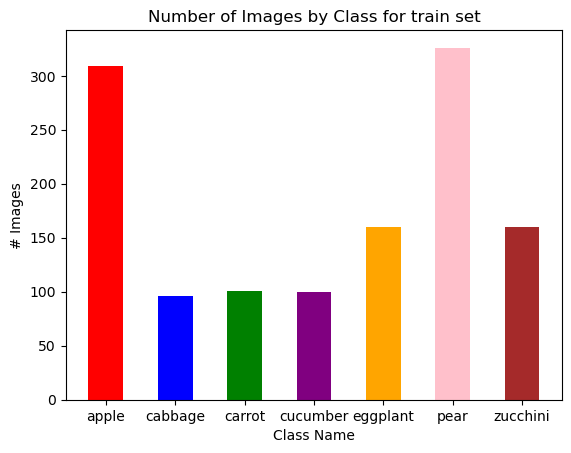

In [32]:
classes_train = {'apple': len(os.listdir('dataset/train/apple')), # Counting the number of images in each class' folder.
'cabbage': len(os.listdir('dataset/train/cabbage')),
'carrot': len(os.listdir('dataset/train/carrot')),
'cucumber': len(os.listdir('dataset/train/cucumber')),
'eggplant': len(os.listdir('dataset/train/eggplant')),
'pear': len(os.listdir('dataset/train/pear')),
'zucchini': len(os.listdir('dataset/train/zucchini'))}

colours = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown']
plt.bar(classes_train.keys(), classes_train.values(), width = .5, color=colours)
plt.title("Number of Images by Class for train set")
plt.xlabel('Class Name')
plt.ylabel('# Images')

Text(0, 0.5, '# Images')

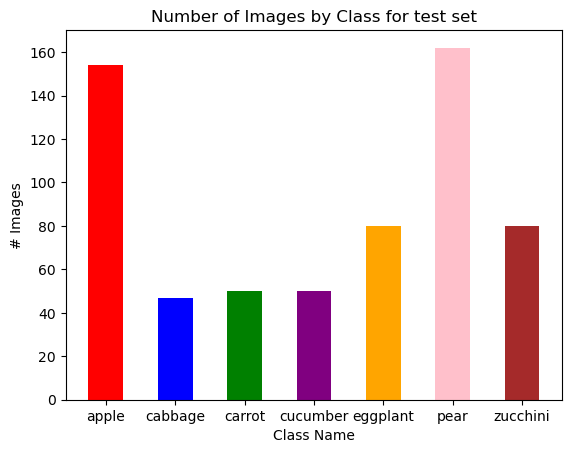

In [33]:
classes_test = {'apple': len(os.listdir('dataset/test/apple')),
'cabbage': len(os.listdir('dataset/test/cabbage')),
'carrot': len(os.listdir('dataset/test/carrot')),
'cucumber': len(os.listdir('dataset/test/cucumber')),
'eggplant': len(os.listdir('dataset/test/eggplant')),
'pear': len(os.listdir('dataset/test/pear')),
'zucchini': len(os.listdir('dataset/test/zucchini'))}

plt.bar(classes_test.keys(), classes_test.values(), width = .5, color=colours)
plt.title("Number of Images by Class for test set")
plt.xlabel('Class Name')
plt.ylabel('# Images')

After we look at the frequency of images per class for both the train and test sets, we can clearly see that there are more Pear, and Apple images when compared to the rest of the classes. Therefore the classes are not balanced. However our train and test split almost have the same percentage of imbalance among the classes.

Text(0, 0.5, '# Images')

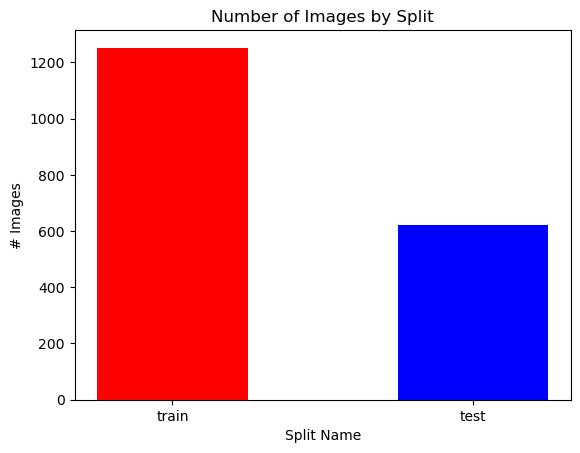

In [34]:
plt.bar(['train','test'], [sum(classes_train.values()),sum(classes_test.values())], width = .5, color=colours)
plt.title("Number of Images by Split")
plt.xlabel('Split Name')
plt.ylabel('# Images')

In [35]:
print(f'We have {sum(classes_train.values())} train images in total')
print(f'We have {sum(classes_test.values())} test images in total')
print(f'We have {len(classes_test.values())} different classes in dataset')

We have 1252 train images in total
We have 623 test images in total
We have 7 different classes in dataset


In [36]:
for classs, freq in classes_train.items():
    print(f'{classs} has {freq} images in the train set')

apple has 309 images in the train set
cabbage has 96 images in the train set
carrot has 101 images in the train set
cucumber has 100 images in the train set
eggplant has 160 images in the train set
pear has 326 images in the train set
zucchini has 160 images in the train set


In [37]:
for classs, freq in classes_test.items():
    print(f'{classs} has {freq} images in the test set')

apple has 154 images in the test set
cabbage has 47 images in the test set
carrot has 50 images in the test set
cucumber has 50 images in the test set
eggplant has 80 images in the test set
pear has 162 images in the test set
zucchini has 80 images in the test set


/tmp/ipykernel_29365/1612097815.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, n)


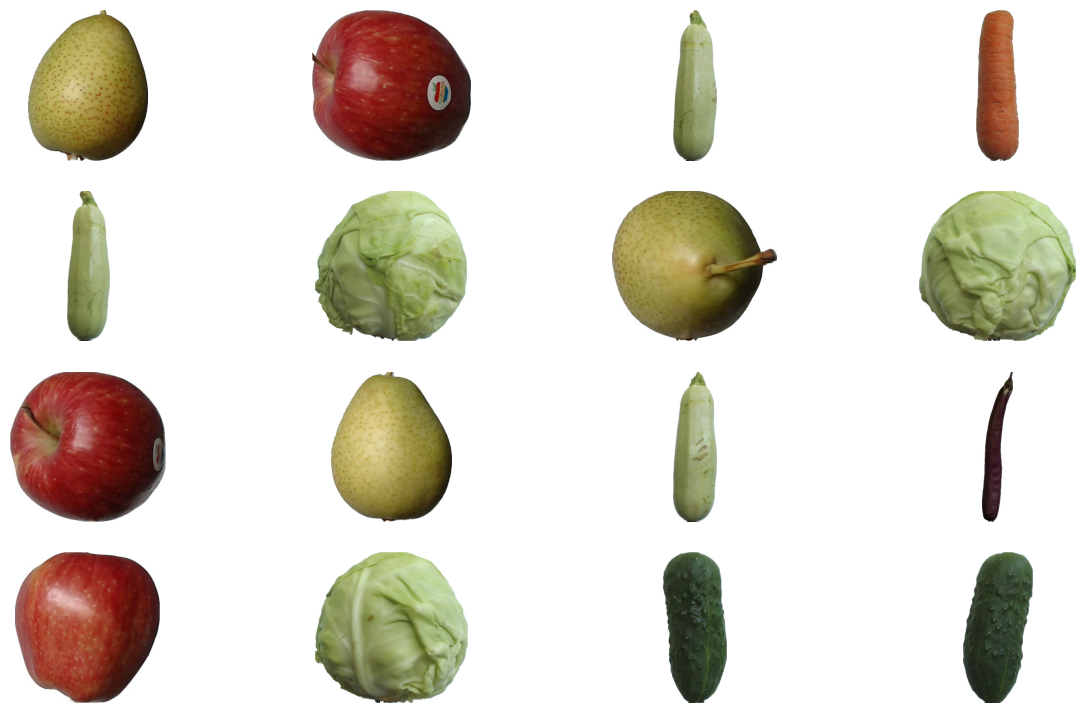

In [38]:
# randomly view train images
train_folder = 'dataset/train'
images = []
for folder in os.listdir(train_folder):
  for image in os.listdir(train_folder + '/' + folder):
    images.append(os.path.join(train_folder, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

In [59]:
files = {}
for i in os.listdir('dataset/train'):
    files[i] = []
    for j in os.listdir(f'dataset/train/{i}'):
        files[i].append(os.path.join('dataset/train', i, j))
images = files
for i in os.listdir('dataset/train'):
    images[i] = [cv2.imread(i) for i in images[i]]

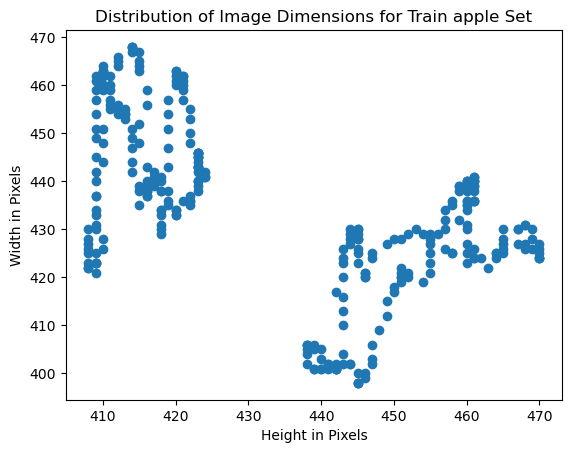

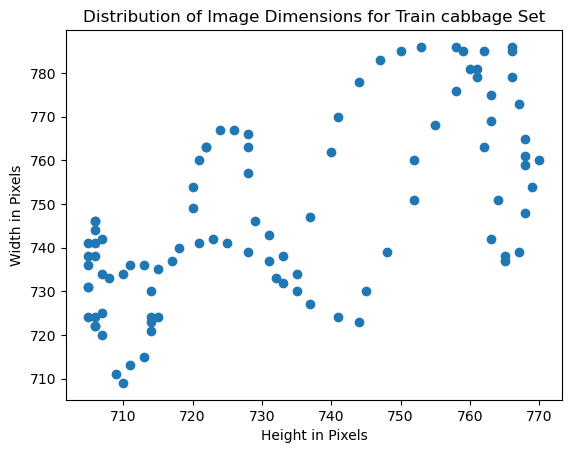

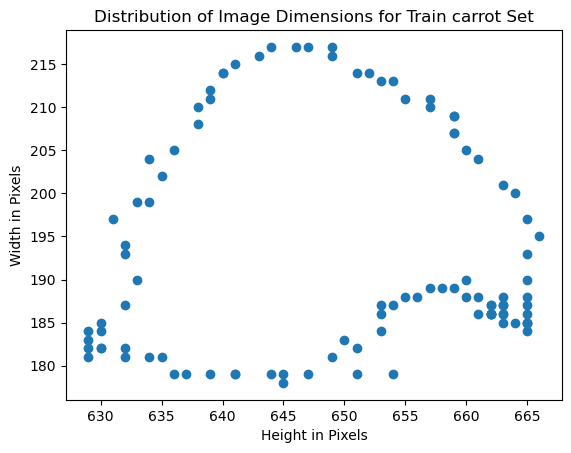

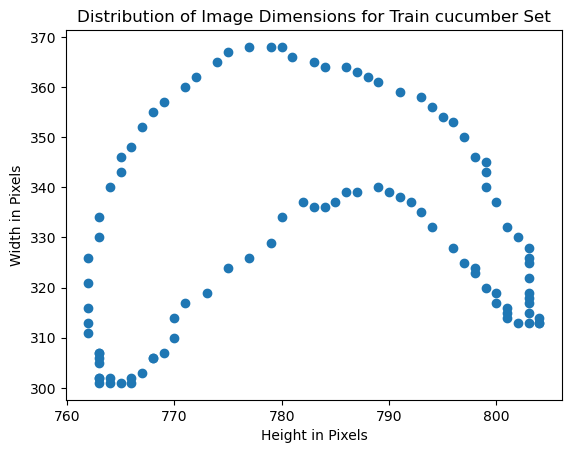

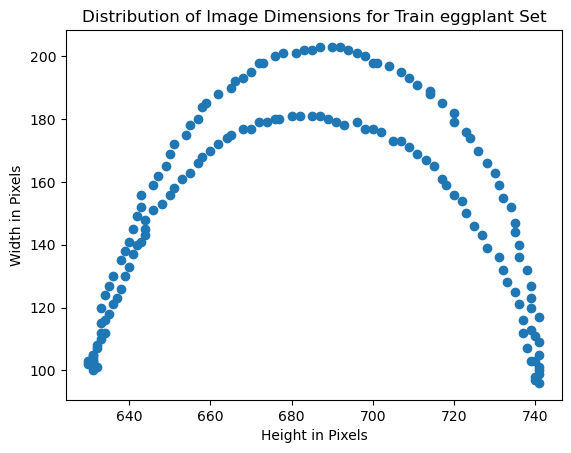

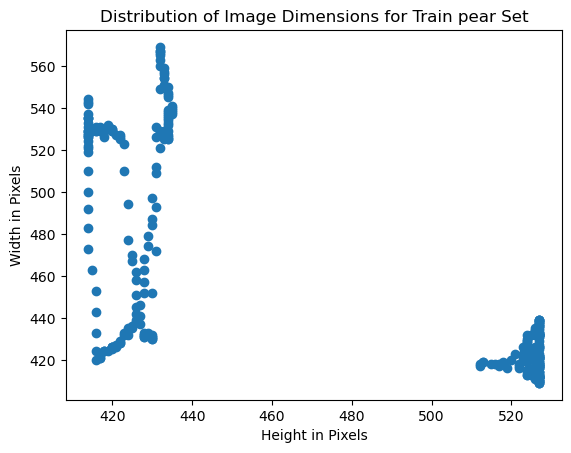

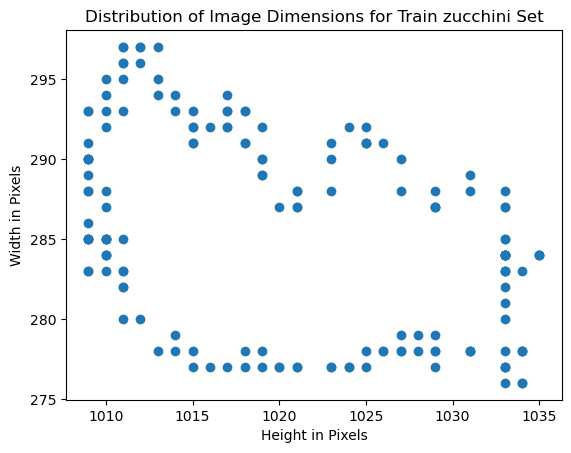

In [61]:
for i in os.listdir('dataset/train'):
    heights = [j.shape[0] for j in images[i]]
    widths = [j.shape[1] for j in images[i]]
    plt.scatter(heights, widths)
    plt.xlabel("Height in Pixels")
    plt.ylabel("Width in Pixels")
    plt.title(f"Distribution of Image Dimensions for Train {i} Set")
    plt.show()

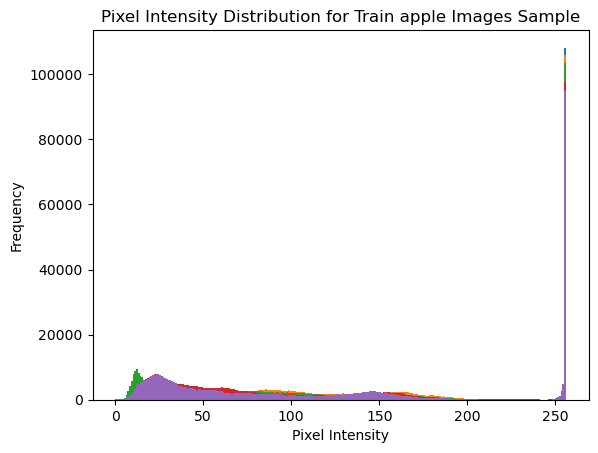

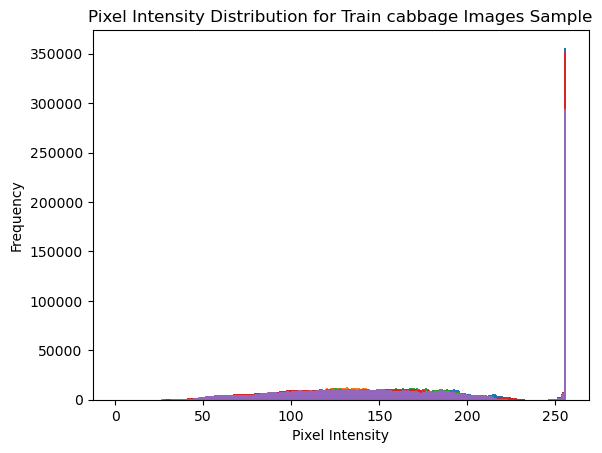

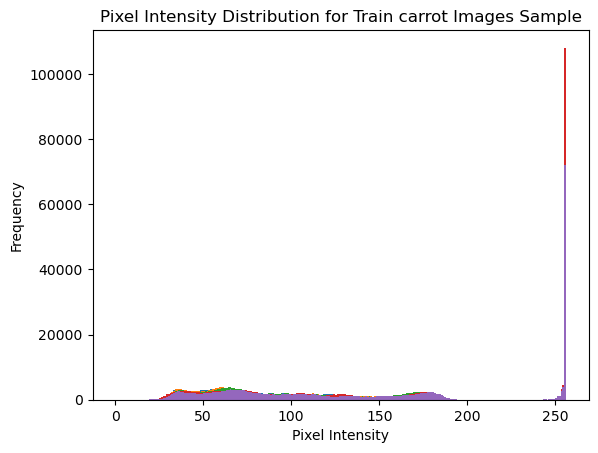

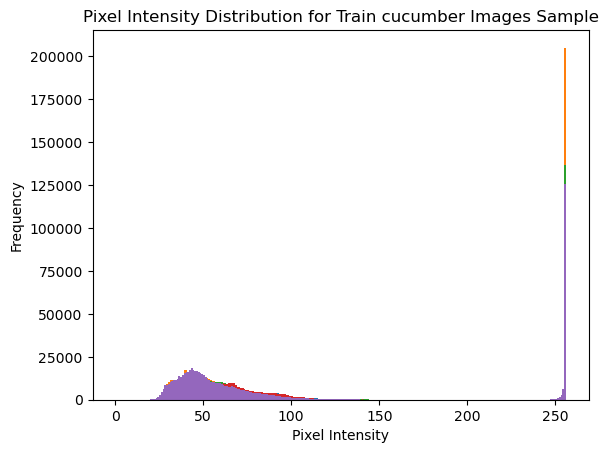

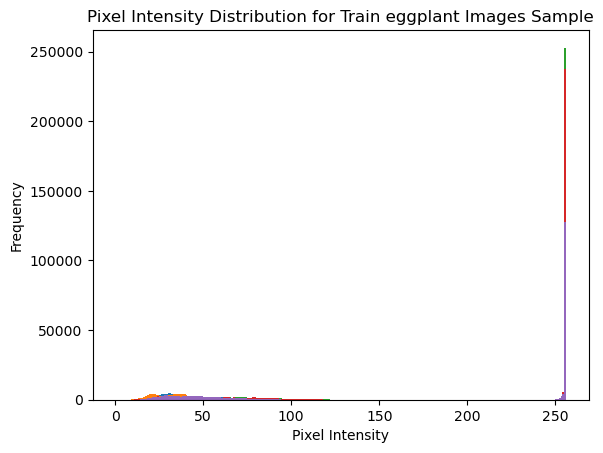

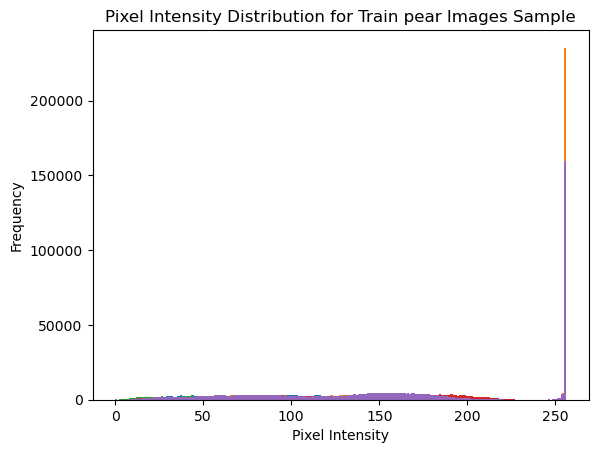

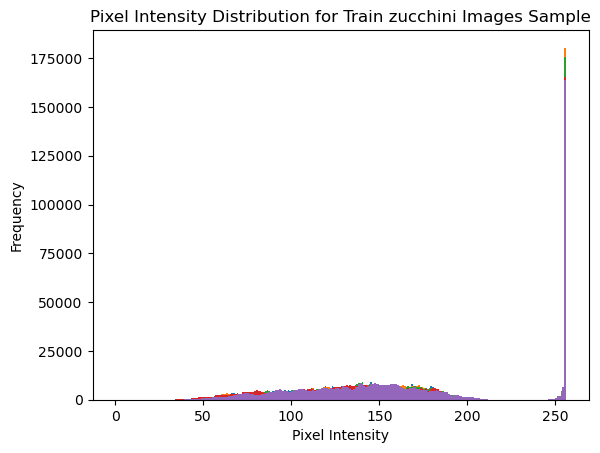

In [70]:
for i in images.keys():
    sample_images = random.sample(images[i], 5)
    for img in sample_images:
        plt.hist(img.ravel(), 256, [0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'Pixel Intensity Distribution for Train {i} Images Sample')
    plt.show()

In [71]:
files = {}
for i in os.listdir('dataset/test'):
    files[i] = []
    for j in os.listdir(f'dataset/test/{i}'):
        files[i].append(os.path.join('dataset/test', i, j))
images = files
for i in os.listdir('dataset/test'):
    images[i] = [cv2.imread(i) for i in images[i]]

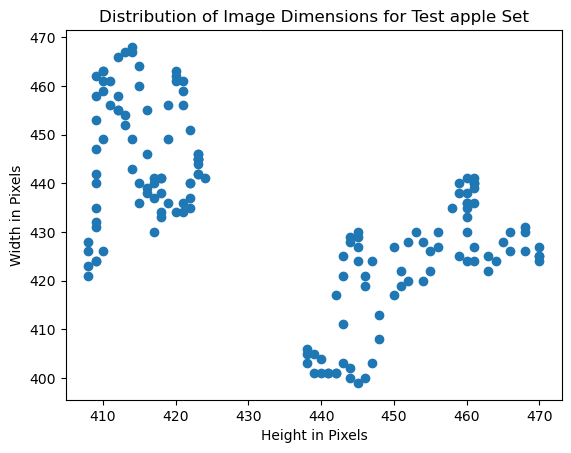

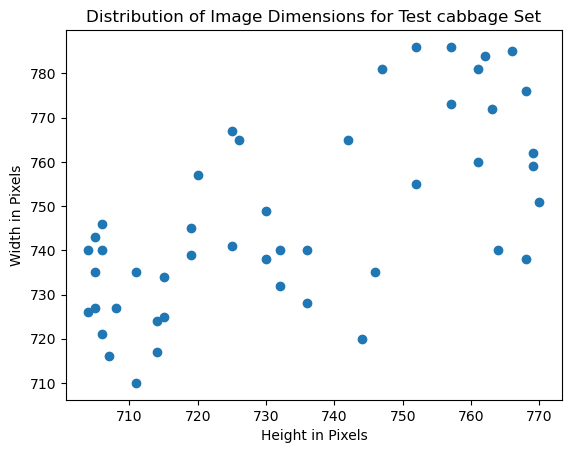

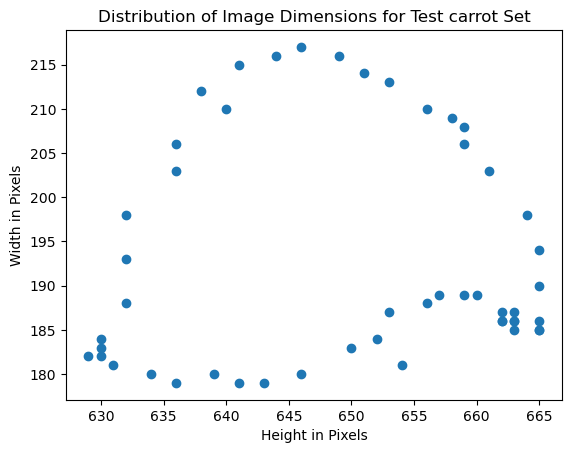

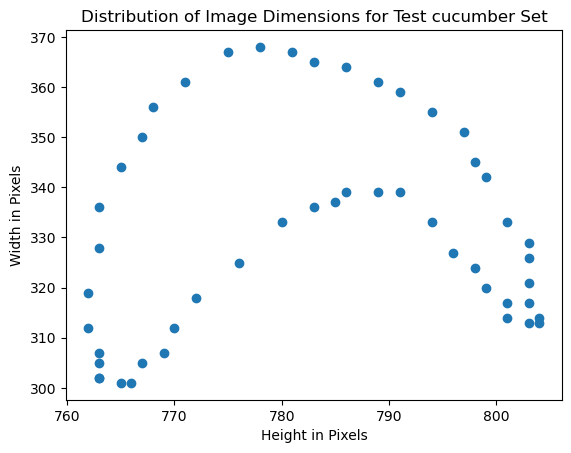

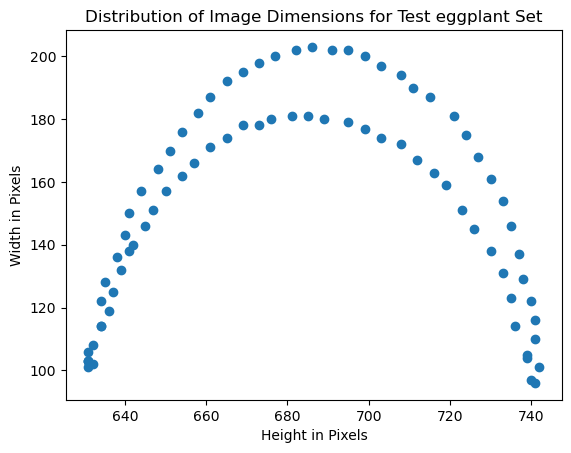

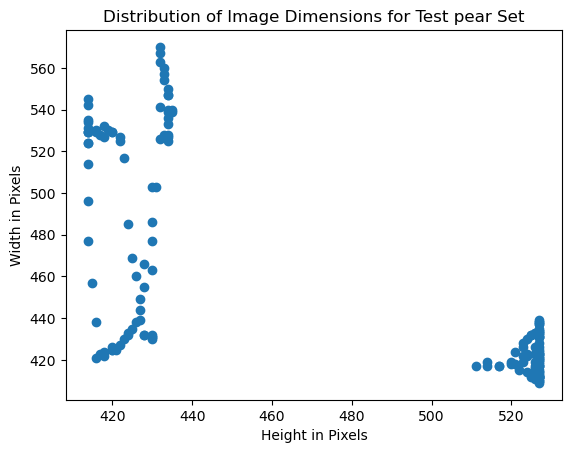

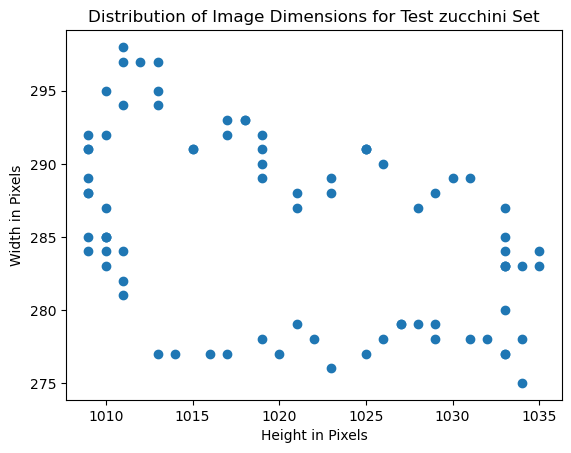

In [72]:
for i in os.listdir('dataset/test'):
    heights = [j.shape[0] for j in images[i]]
    widths = [j.shape[1] for j in images[i]]
    plt.scatter(heights, widths)
    plt.xlabel("Height in Pixels")
    plt.ylabel("Width in Pixels")
    plt.title(f"Distribution of Image Dimensions for Test {i} Set")
    plt.show()

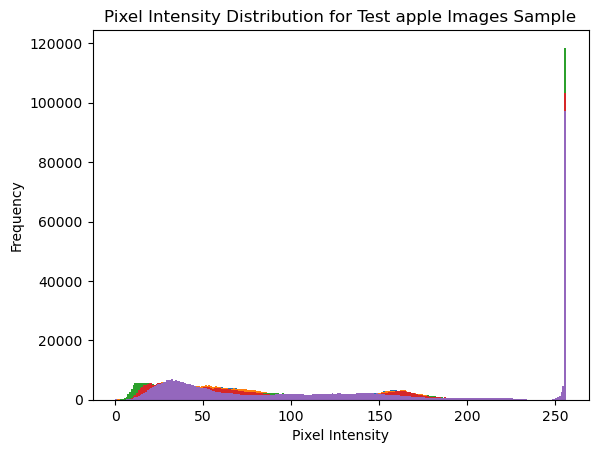

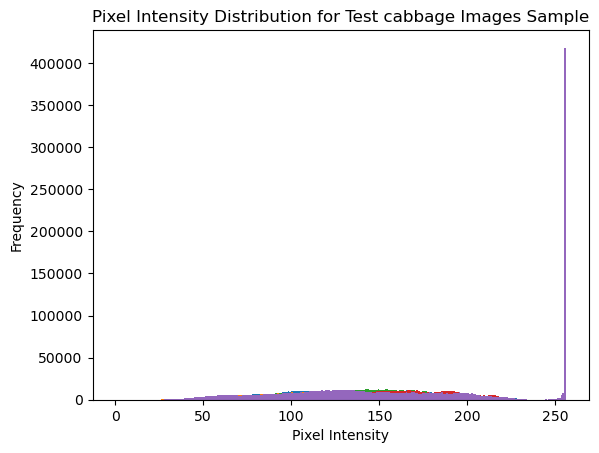

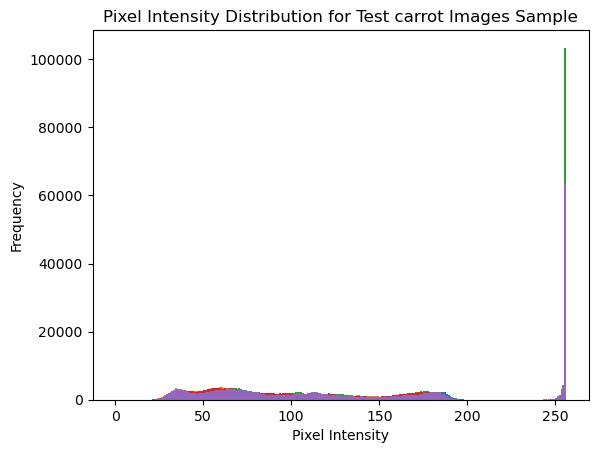

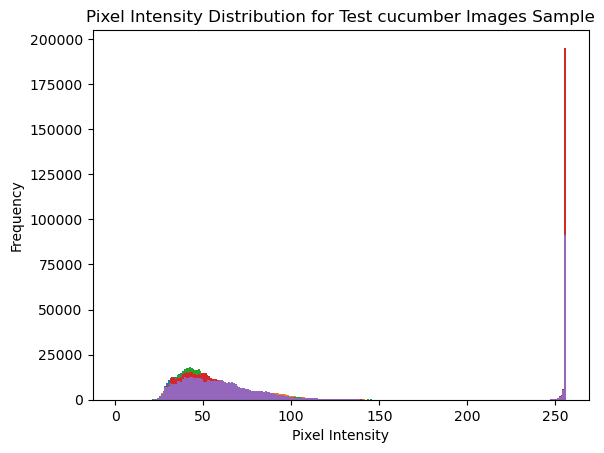

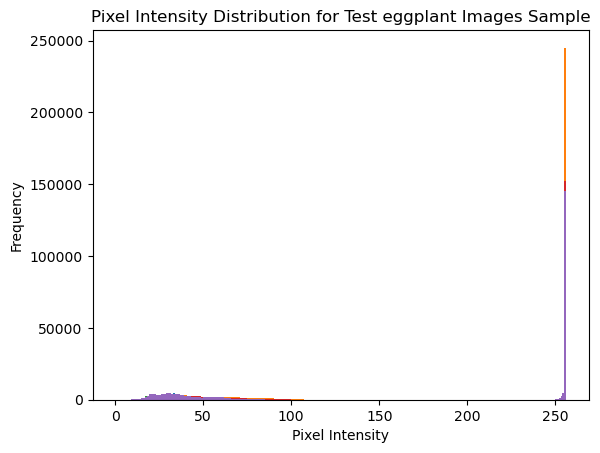

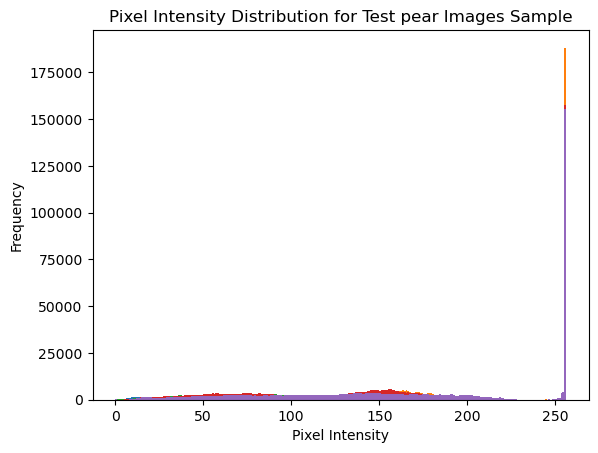

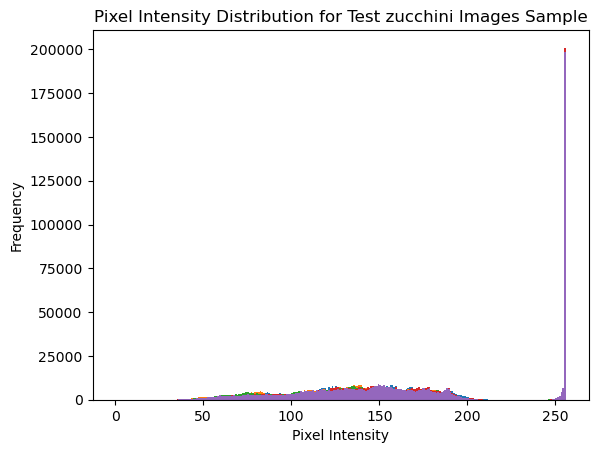

In [75]:
for i in images.keys():
    sample_images = random.sample(images[i], 5)
    for img in sample_images:
        plt.hist(img.ravel(), 256, [0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'Pixel Intensity Distribution for Test {i} Images Sample')
    plt.show()

# 2. Perform necessary pre-processing and data augmentation.

In [9]:
##create an object of ImageDataGenerator, for augmenting train set
train_datagen = ImageDataGenerator(rescale = 1./255, # rescales the 0-255 range image to 0-1
                                   rotation_range=15, # Specifies a range for random rotation of the images, in degrees. In this case, it allows rotations from -15 to +15 degrees.
                                   width_shift_range=0.1, # # Defines the range for random horizontal shifting of the image, specified as a fraction of the total width (10% of the width in this case).
                                   height_shift_range=0.1, # Defines the range for random vertical shifting of the image, specified as a fraction of the total height (10% of the height in this case).
                                   zoom_range = 0.1, # Specifies the range for random zooming of the image. A value of 0.1 means zooming in or out up to 10%.
                                   vertical_flip=False, # Determines whether random vertical flips (flipping the image upside down) should be applied. In this case, it's set to False, meaning no vertical flips are applied.
                                   horizontal_flip = True, # Determines whether random horizontal flips (mirroring the image left to right) should be applied. In this case, it's set to True, meaning horizontal flips are allowed.
                                   fill_mode="reflect") # Specifies how to fill in new pixels that may be created during image transformation (e.g., rotation or shifting). "reflect" means it will mirror the existing pixels at the image boundary.

##create another object of ImageDataGenerator, for augmenting test set
test_datagen = ImageDataGenerator(rescale = 1./255)

##apply image augmentation on train set by resizing all images to 224x224 and creating batches of 32 images.
training_set = train_datagen.flow_from_directory('dataset/train', # Specifies the directory where the training data is located.
                                                 target_size = (224,224), # Sets the target size for the input images to 224x224 pixels and resizes images.
                                                 batch_size = 8) # Defines the batch size, which determines how many images will be processed at a time during training.

##apply image augmentation on test set by resizing all images to 224x224 and creating batches of 32 images.
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224,224),
                                            batch_size = 8)

Found 1252 images belonging to 7 classes.
Found 623 images belonging to 7 classes.


# 3. Build a suitable CNN architecture following the 5 steps in the NN model life-cycle.

In [10]:
# creating the VGG16 CNN Model
model = Sequential() # Initializes a Sequential model

# Add a Convolutional 2D layer with an input size of 224x224 and 3 channels for RGB, 64 filters, a 3x3 kernel, and "same" padding. With the ReLU activation function.
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

# Add another Convolutional 2D layer with the same specifications as the previous layer.
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

# Add a Max Pooling 2D layer with a 2x2 pool size and a 2x2 stride for downsampling.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Adds 2 Convolutional 2D layers with 128 filters, a 3x3 kernel, and "same" padding. With the ReLU activation function.
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

# Add a Max Pooling 2D layers with a 2x2 pool size and a 2x2 stride for downsampling.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Adds 3 Convolutional 2D layers with 256 filters, a 3x3 kernel, and "same" padding. With the ReLU activation function.
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

# Add a Max Pooling 2D layers with a 2x2 pool size and a 2x2 stride for downsampling.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Adds 3 Convolutional 2D layers with 512 filters, a 3x3 kernel, and "same" padding. With the ReLU activation function.
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# Add a Max Pooling 2D layers with a 2x2 pool size and a 2x2 stride for downsampling.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Adds 3 Convolutional 2D layers with 512 filters, a 3x3 kernel, and "same" padding. With the ReLU activation function.
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# Add a Max Pooling 2D layers with a 2x2 pool size and a 2x2 stride for downsampling.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Flatten the output from the previous layer to prepare it for the fully connected layers.
model.add(Flatten())

# Adds 2 fully connected Dense layer with 4096 units and ReLU activation.
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))

# Add a final fully connected Dense layer with 7 units and a softmax activation for classification.
model.add(Dense(units=7, activation="softmax"))

2023-10-13 12:28:57.893362: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-13 12:28:57.895560: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-13 12:28:57.895581: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-13 12:28:57.896681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-13 12:28:57.896701: I tensorflow/compile

In [11]:
opt = Adam(learning_rate=0.001) # Create an Adam optimizer instance with a learning rate of 0.001.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Compile the model, specifying the optimizer, loss function, and metrics for training and evaluation.
# we are using categorical_crossentropy as loss because we are dealing with a multi class classification problem.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [13]:
checkpoint = ModelCheckpoint('best_model_VGG16.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
csv_logger = CSVLogger('trainingVGG16.log.csv')
early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
callbacks_list = [checkpoint, csv_logger, early_stop]

In [14]:
###steps_per_epoch: num of data divided by batch size
###validation_steps: num of data divided by batch size
history = model.fit_generator(generator=training_set,
                         steps_per_epoch = (1252/8),
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = (623 /8),
                         callbacks=callbacks_list)

/tmp/ipykernel_16228/1273418004.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set,


Epoch 1/100


2023-10-13 12:29:00.305664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-13 12:29:00.870260: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa04002fd50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-13 12:29:00.870281: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2023-10-13 12:29:00.872902: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-13 12:29:00.922002: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/156 [==============================] - ETA: 0s - loss: 2.0673 - accuracy: 0.2452
Epoch 1: val_loss improved from inf to 1.84111, saving model to best_model_VGG16.hdf5


/home/roccyk/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 22s 110ms/step - loss: 2.0673 - accuracy: 0.2452 - val_loss: 1.8411 - val_accuracy: 0.2600
Epoch 2/100
157/156 [==============================] - ETA: 0s - loss: 1.8356 - accuracy: 0.2476
Epoch 2: val_loss improved from 1.84111 to 1.82437, saving model to best_model_VGG16.hdf5
156/156 [==============================] - 17s 105ms/step - loss: 1.8356 - accuracy: 0.2476 - val_loss: 1.8244 - val_accuracy: 0.2600
Epoch 3/100
157/156 [==============================] - ETA: 0s - loss: 1.8351 - accuracy: 0.2412
Epoch 3: val_loss improved from 1.82437 to 1.82416, saving model to best_model_VGG16.hdf5
156/156 [==============================] - 16s 105ms/step - loss: 1.8351 - accuracy: 0.2412 - val_loss: 1.8242 - val_accuracy: 0.2472
Epoch 4/100
157/156 [==============================] - ETA: 0s - loss: 1.8334 - accuracy: 0.2564
Epoch 4: val_loss did not improve from 1.82416
156/156 [==============================] - 15s 93ms/step - loss: 1.8334 - accura

# 4. Evaluate the performance of the model.

In [15]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('> %.3f' % (acc * 100.0))

/tmp/ipykernel_16228/3528342730.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)


> 26.003


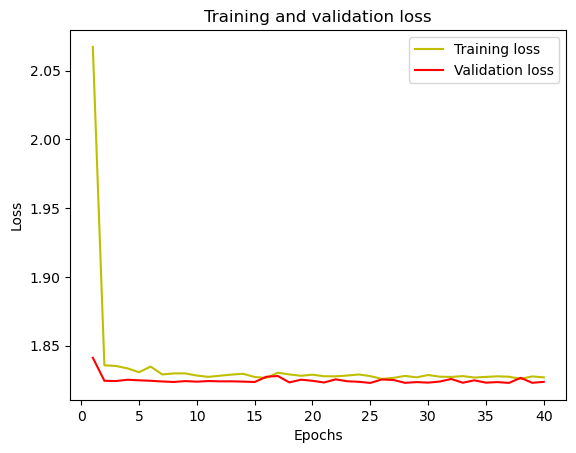

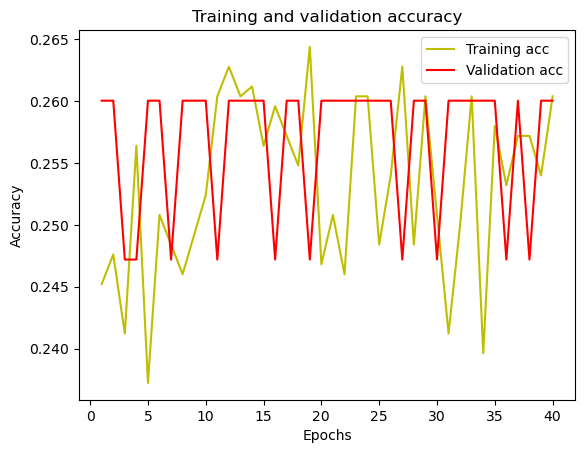

In [16]:
history = history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Our loss and accuracy is flat lining because we do not have enough images to train our CNN on. Therefore, it does not have enough data to extract meaningful features from the images presented.

# 5. Perform model saving and prediction on new datapoints.

In [17]:
test_image = load_img('new_samples/r0_0.jpg', 
                            target_size = (224, 224))

In [18]:
#add channel dimension for image
test_image = img_to_array(test_image)

In [19]:
##add batch dimension for image
test_image = np.expand_dims(test_image, axis = 0)

In [20]:
result = np.argmax(model.predict(test_image))

1/1 [==============================] - 0s 128ms/step


In [21]:
training_set.class_indices

{'apple': 0,
 'cabbage': 1,
 'carrot': 2,
 'cucumber': 3,
 'eggplant': 4,
 'pear': 5,
 'zucchini': 6}

In [22]:
if result == 0:
    print('apple')
elif result == 1:
    print('cabbage')
elif result == 2:
    print('carrot')
elif result == 3:
    print('cucumber')
elif result == 4:
    print('eggplant')
elif result == 5:
    print('pear')
elif result == 6:
    print('zucchini')

pear


In [23]:
result

5

In [24]:
model.save("vgg16_1.h5")

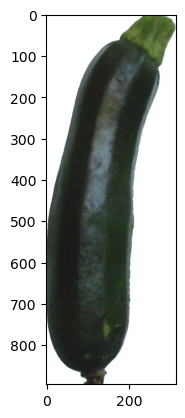

1/1 [==============================] - 0s 57ms/step
pear
1/1 [==============================] - 0s 10ms/step
[[0.23267746 0.07855044 0.08341943 0.08649468 0.13081548 0.2578519
  0.13019067]]


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(224, 224))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 224, 224, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
path = 'new_samples/r0_67.jpg'
img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()
img = load_image(path)
model = load_model('vgg16_1.h5')
# predict the class
result=np.argmax(model.predict(img), axis=-1)
if result == 0:
    print('apple')
elif result == 1:
    print('cabbage')
elif result == 2:
    print('carrot')
elif result == 3:
    print('cucumber')
elif result == 4:
    print('eggplant')
elif result == 5:
    print('pear')
elif result == 6:
    print('zucchini')
print(model.predict(img))

# AlexNet

## Created a new instance of ImageDataGenerator for AlexNet size of (227,227,3)

In [31]:
##create an object of ImageDataGenerator, for augmenting train set
train_datagen = ImageDataGenerator(rescale = 1./255, # rescales the 0-255 range image to 0-1
                                   rotation_range=15, # Specifies a range for random rotation of the images, in degrees. In this case, it allows rotations from -15 to +15 degrees.
                                   width_shift_range=0.1, # # Defines the range for random horizontal shifting of the image, specified as a fraction of the total width (10% of the width in this case).
                                   height_shift_range=0.1, # Defines the range for random vertical shifting of the image, specified as a fraction of the total height (10% of the height in this case).
                                   zoom_range = 0.1, # Specifies the range for random zooming of the image. A value of 0.1 means zooming in or out up to 10%.
                                   vertical_flip=False, # Determines whether random vertical flips (flipping the image upside down) should be applied. In this case, it's set to False, meaning no vertical flips are applied.
                                   horizontal_flip = True, # Determines whether random horizontal flips (mirroring the image left to right) should be applied. In this case, it's set to True, meaning horizontal flips are allowed.
                                   fill_mode="reflect") # Specifies how to fill in new pixels that may be created during image transformation (e.g., rotation or shifting). "reflect" means it will mirror the existing pixels at the image boundary.

##create another object of ImageDataGenerator, for augmenting test set
test_datagen = ImageDataGenerator(rescale = 1./255)

##apply image augmentation on train set by resizing all images to 224x224 and creating batches of 32 images.
training_set = train_datagen.flow_from_directory('dataset/train', # Specifies the directory where the training data is located.
                                                 target_size = (227,227), # Sets the target size for the input images to 224x224 pixels and resizes images.
                                                 batch_size = 8) # Defines the batch size, which determines how many images will be processed at a time during training.

##apply image augmentation on test set by resizing all images to 224x224 and creating batches of 32 images.
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (227,227),
                                            batch_size = 8)

Found 1252 images belonging to 7 classes.
Found 623 images belonging to 7 classes.


## Define Network

In [32]:
keras.backend.clear_session()

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation="relu"))
# Pooling 
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Add Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(units=4096, activation="relu"))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Add Batch Normalisation
model.add(BatchNormalization())

# 2nd Fully Connected Layer
model.add(Dense(units=4096, activation="relu"))
# Add Dropout
model.add(Dropout(0.4))
# Add Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(units=7, activation="softmax"))

## Compile Network

In [33]:
opt = Adam(learning_rate=0.001) # Create an Adam optimizer instance with a learning rate of 0.001.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Compile the model, specifying the optimizer, loss function, and metrics for training and evaluation.
# we are using categorical_crossentropy as loss because we are dealing with a multi class classification problem.

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                        

## Fit Network

In [35]:
checkpoint = ModelCheckpoint('best_model_AlexNet.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
csv_logger = CSVLogger('trainingAlexNet.log.csv')
early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
callbacks_list = [checkpoint, csv_logger, early_stop]

In [36]:
###steps_per_epoch: num of data divided by batch size
###validation_steps: num of data divided by batch size
history = model.fit_generator(generator=training_set,
                         steps_per_epoch = (1252/8),
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = (623 /8),
                         callbacks=callbacks_list)

Epoch 1/100


/tmp/ipykernel_16228/1273418004.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set,


157/156 [==============================] - ETA: 0s - loss: 1.5691 - accuracy: 0.6198
Epoch 1: val_loss improved from inf to 1.21690, saving model to best_model_AlexNet.hdf5
156/156 [==============================] - 18s 102ms/step - loss: 1.5691 - accuracy: 0.6198 - val_loss: 1.2169 - val_accuracy: 0.8138
Epoch 2/100
157/156 [==============================] - ETA: 0s - loss: 1.0449 - accuracy: 0.7484
Epoch 2: val_loss did not improve from 1.21690
156/156 [==============================] - 15s 99ms/step - loss: 1.0449 - accuracy: 0.7484 - val_loss: 2.3262 - val_accuracy: 0.7239
Epoch 3/100
157/156 [==============================] - ETA: 0s - loss: 0.7818 - accuracy: 0.8067
Epoch 3: val_loss did not improve from 1.21690
156/156 [==============================] - 16s 102ms/step - loss: 0.7818 - accuracy: 0.8067 - val_loss: 8.4521 - val_accuracy: 0.5650
Epoch 4/100
157/156 [==============================] - ETA: 0s - loss: 0.9544 - accuracy: 0.7700
Epoch 4: val_loss did not improve from 1.

## Evaluate Network

In [37]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('> %.3f' % (acc * 100.0))

/tmp/ipykernel_16228/3528342730.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)


> 82.183


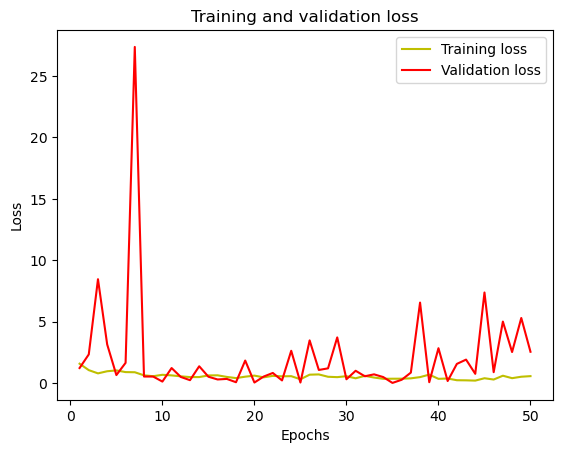

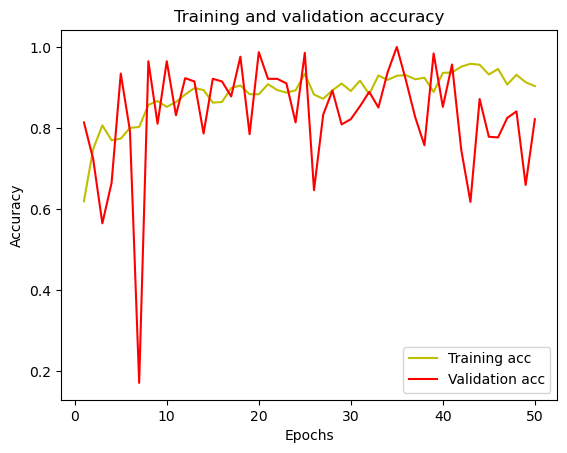

In [38]:
history = history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

When compared to the VGG16 learning curve we can see that there is no flatline and on average the AlexNet model does improve every few epochs.

## Make Predictions

In [39]:
test_image = load_img('new_samples/r0_0.jpg', 
                            target_size = (227, 227))

In [40]:
#add channel dimension for image
test_image = img_to_array(test_image)

In [41]:
##add batch dimension for image
test_image = np.expand_dims(test_image, axis = 0)

In [42]:
result = np.argmax(model.predict(test_image))

1/1 [==============================] - 0s 168ms/step


In [43]:
training_set.class_indices

{'apple': 0,
 'cabbage': 1,
 'carrot': 2,
 'cucumber': 3,
 'eggplant': 4,
 'pear': 5,
 'zucchini': 6}

In [44]:
if result == 0:
    print('apple')
elif result == 1:
    print('cabbage')
elif result == 2:
    print('carrot')
elif result == 3:
    print('cucumber')
elif result == 4:
    print('eggplant')
elif result == 5:
    print('pear')
elif result == 6:
    print('zucchini')

apple


In [45]:
result

0

In [46]:
model.save("alexNet.h5")

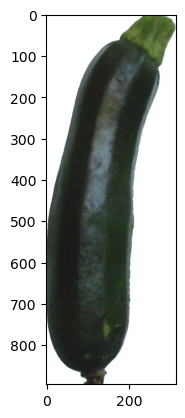

1/1 [==============================] - 0s 59ms/step
eggplant
1/1 [==============================] - 0s 10ms/step
[[8.4354405e-14 7.7659375e-21 1.6165982e-20 9.2391949e-03 9.9076080e-01
  2.6540688e-12 1.1549846e-09]]


In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(227, 227))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 227, 227, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
path = 'new_samples/r0_67.jpg'
img1 = mpimg.imread(path)
imgplot = plt.imshow(img1)
plt.show()
img = load_image(path)
model = load_model('alexNet.h5')
# predict the class
result=np.argmax(model.predict(img), axis=-1)
if result == 0:
    print('apple')
elif result == 1:
    print('cabbage')
elif result == 2:
    print('carrot')
elif result == 3:
    print('cucumber')
elif result == 4:
    print('eggplant')
elif result == 5:
    print('pear')
elif result == 6:
    print('zucchini')
print(model.predict(img))

# Conclusion


In conclusion, the underperformance of my VGG16 model when compared to AlexNet on a small image dataset can be caused by several factors such as the small size of our dataset, the class imbalance we have in our dataset, and the complexity of the VGG16 model when compared to AlexNet. AlexNet has 24,793,863 total parameters and VGG16 has 134,289,223, which is more than 5 times the amount more than AlexNet. Since our dataset is so small we are underfitting the VGG16 model causing a very low accuracy score. The VGG16 model does not have enough data to extract meaningful features from the images. My recommendation to remedy that is through a method called transfer learning. It is when we load the pre-trained weights of the CNN. Then, when we retrain the model for our use case, we can freeze the weights of the CNN part of our model and only train the fully connected layers on our small dataset. We should expect to see an increase in our VGG16 model's performance on the small dataset after using the transfer learning method. Another recommendation is to increase the ranges in our data augmentation function, to give the model more variety of rotation, zoom, shift, and pans of the images. However, since we are using the same images for each class, there is a good chance that the model may overfit those images for each class. I believe that AlexNet is more suitable to use than VGG16 for this particular dataset because of its small size. Also, AlexNet has 2 dropout layers in its fully connected layers helping to decrease the chances of overfitting in a small dataset.